# **David Saavedra Fernández**

# **Ejemplo 5:** Escalamiento de datos
24_25

In [ ]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))

# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

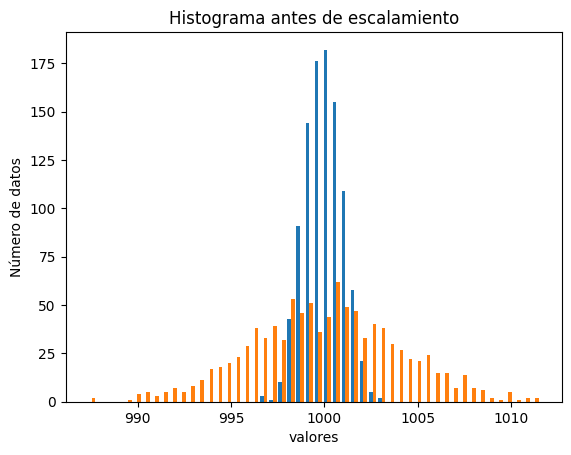

In [ ]:
# Histograma antes de escalamiento
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


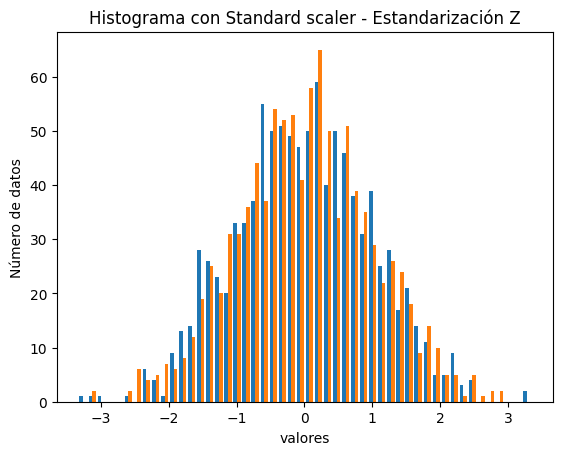

In [ ]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [ ]:
Data_prep_SS.std()


1.0000000000000004

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



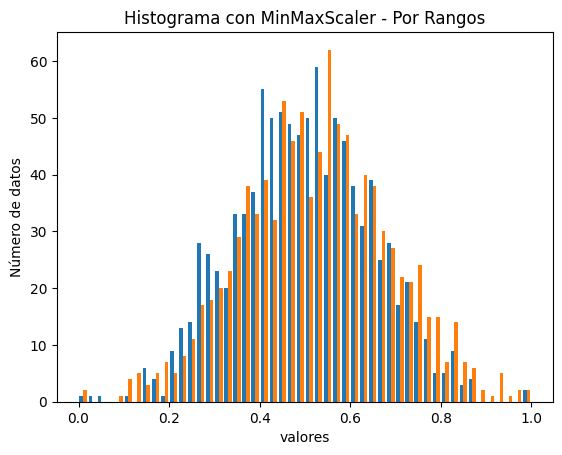

In [ ]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [ ]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

1.0

In [ ]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

1.0

In [ ]:
X = [1,2,3,4,5,6,7,8,9,10]

Ejercicio: ¿Cuánto vale la media, mediana, la desviación estándar muestral, la varianza muestral y el rango de la variable X?

In [ ]:
media = np.mean(X)
mediana = np.median(X)
desviacion_estandar = np.std(X)
varianza = np.var(X)
rango = np.max(X)-np.min(X)

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_estandar)
print("Varianza:", varianza)
print("Rango:", rango)

Media: 5.5
Mediana: 5.5
Desviación estándar: 2.8722813232690143
Varianza: 8.25
Rango: 9


Ejercicio: Utilizar la función describe() de Pandas para obtener la media, desviación estándar...

In [ ]:
pd.DataFrame(X).describe()

,0
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


**Ejercicio**: Escalamiento mediante rangos, calcular la media y la mediana de la variable escalada

In [ ]:
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_RR = preprocessor_RR.fit_transform(Data)

print("Media escalado por rangos:", np.mean(Data_prep_RR))
print("Mediana escalado por rangos:", np.median(Data_prep_RR))

Media escalado por rangos: 0.5062708506073139
Mediana escalado por rangos: 0.5029013066125962


Ejercicio: Escalamiento Z-score, calcular la media y la mediana

In [ ]:
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')
Data_prep_SS = preprocessor_SS.fit_transform(Data)

print("Media escalado Z-score:", np.mean(Data_prep_SS))
print("Mediana escalado Z-score:", np.median(Data_prep_SS))

Media escalado Z-score: 2.1183055309847988e-14
Mediana escalado Z-score: -0.02248578828583471
